In [1]:
from math import sin, cos, log

In [3]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [4]:
g = 9.8
v_t = 4.9
C_D = 1.0/5.0
C_L = 1.0

v0 = 6.5
theta0 = -0.1
x0 = 0.0
y0 = 2.0

In [5]:
def f(u):
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return np.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,\
                    -g*cos(theta)/v + g/v_t**2*v,
                    v*cos(theta),
                    v*sin(theta)])

In [10]:
def euler_step(u, f, dt):
    return u + dt*f(u)

def get_diffgrid(u_current, u_fine, dt):
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
    
    grid_size_ratio = np.ceil(N_fine/N_current)
    
    diffgrid = dt * np.sum( np.abs(u_current[:,2] - u_fine[::grid_size_ratio,2]))
    
    return diffgrid

In [7]:
def rk2_step(u, f, dt):
    
    u_star = u + 0.5*dt*f(u)
    return u + dt*f(u_star)

In [12]:
T = 15.0
dt = 0.01
N =int(T/dt) + 1

u_euler = np.empty((N, 4))
u_rk2 = np.empty((N, 4))

u_euler[0] = np.array([v0, theta0, x0, y0])
u_rk2[0] = np.array([v0, theta0, x0, y0])

for n in range (N-1):
    
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    u_rk2[n+1] = rk2_step(u_rk2[n], f, dt)

In [13]:
x_euler = u_euler[:,2]
y_euler = u_euler[:,3]
x_rk2 = u_rk2[:,2]
y_rk2 = u_rk2[:,3]

In [16]:
idx_negative_euler = np.where(y_euler<0.0)[0]
if len(idx_negative_euler) == 0:
    idx_ground_euler = N-1
    print ('Euler integration has not touched ground yet!')
    
else:
    idx_ground_euler = idx_negative_euler[0]
    
idx_negative_rk2 = np.where(y_rk2<0.0)[0]
if len(idx_negative_rk2) == 0:
    idx_ground_rk2 = N-1
    print ('Runge-Kutta integration has not touched ground yet!')
    
else:
    idx_ground_rk2 = idx_negative_rk2[0]

In [17]:
print('Are the x-values close? {}'.format(np.allclose(x_euler, x_rk2)))
print('Are the y-values close? {}'.format(np.allclose(y_euler, y_rk2)))

Are the x-values close? False
Are the y-values close? False


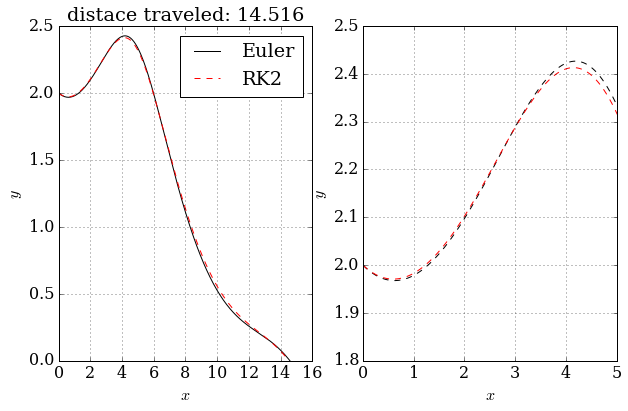

In [19]:
pyplot.figure(figsize=(10,6))
pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_euler[:idx_ground_euler], y_euler[:idx_ground_euler], 'k-', label='Euler')
pyplot.plot(x_rk2[:idx_ground_rk2], y_rk2[:idx_ground_rk2], 'r--', label='RK2')
pyplot.title('distace traveled: {:.3f}'.format(x_rk2[idx_ground_rk2-1]))
pyplot.legend();

pyplot.subplot(122)
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_euler, y_euler, 'k--', label='Euler')
pyplot.plot(x_rk2, y_rk2, 'r--', label='RK2')
pyplot.xlim(0, 5)
pyplot.ylim(1.8, 2.5);